# Unsupervised Machine Learning: Dendrograms

### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [6]:
# Create file path
path = r'C:\Users\gre60\OneDrive\CareerFoundry Data Analytics Program\Machine Learning with Python'

In [14]:
# Import scaled European Weather processed data
climate = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [12]:
#Read in the pleasant weather data.
pleasantweather = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasantweather.head()


,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Reducing Dataset

In [29]:
#Reducing dataset to 2019
climate2019 = climate[climate['DATE'].astype(str).str.contains('2019')] #<-----INSERT YEAR HERE
climate2019

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
21550,20190101,1,6,2.5,0.86,1.0333,0.77,0.07,0,0.0,...,5,0.82,1.0142,0.29,0.41,0,3.4,10.7,7.9,13.5
21551,20190102,1,7,2.0,0.69,1.0357,0.33,0.01,0,0.1,...,5,0.82,1.0142,0.32,0.41,0,3.4,10.7,7.9,13.5
21552,20190103,1,3,0.8,0.71,1.0393,0.76,0.00,0,5.1,...,5,0.82,1.0142,0.18,0.41,0,3.4,10.7,7.9,13.5
21553,20190104,1,4,1.1,0.79,1.0382,0.74,0.00,0,5.3,...,5,0.82,1.0142,0.23,0.41,0,3.4,10.7,7.9,13.5
21554,20190105,1,8,1.6,0.82,1.0346,0.50,0.04,0,0.0,...,5,0.82,1.0142,0.13,0.41,0,3.4,10.7,7.9,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,12,8,1.5,0.92,1.0273,0.15,0.52,0,0.1,...,5,0.82,1.0142,0.04,0.41,0,3.4,10.7,7.9,13.5
21911,20191228,12,7,1.9,0.86,1.0380,0.35,0.00,0,1.3,...,5,0.82,1.0142,0.20,0.41,0,3.4,10.7,7.9,13.5
21912,20191229,12,6,1.1,0.93,1.0387,0.61,0.00,0,4.9,...,5,0.82,1.0142,0.24,0.41,0,3.4,10.7,7.9,13.5
21913,20191230,12,1,1.8,0.81,1.0354,0.64,0.00,0,6.5,...,5,0.82,1.0142,0.06,0.41,0,3.4,10.7,7.9,13.5


In [33]:
# Scaling climate2010 for ML
scaler = StandardScaler()

In [37]:
scaled_2019= pd.DataFrame(scaler.fit_transform(climate2010))

In [39]:
scaled_2019.head()

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,-1.644406,-1.602745,0.336058,0.515763,1.150256,1.854928,-0.605872,-0.312858,-0.1206,-1.148010,...,0.0,-1.110223e-16,-2.220446e-16,-0.941645,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
1,-1.641508,-1.602745,0.766448,0.018790,-0.270393,2.127592,-1.105245,-0.442060,-0.1206,-1.126370,...,0.0,-1.110223e-16,-2.220446e-16,-0.907271,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
2,-1.638609,-1.602745,-0.955112,-1.173946,-0.103257,2.536589,-0.617221,-0.463593,-0.1206,-0.044405,...,0.0,-1.110223e-16,-2.220446e-16,-1.067681,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
3,-1.635711,-1.602745,-0.524722,-0.875762,0.565283,2.411618,-0.639920,-0.463593,-0.1206,-0.001126,...,0.0,-1.110223e-16,-2.220446e-16,-1.010392,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
4,-1.632812,-1.602745,1.196837,-0.378789,0.815986,2.002621,-0.912305,-0.377459,-0.1206,-1.148010,...,0.0,-1.110223e-16,-2.220446e-16,-1.124970,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0


In [41]:
scaled_2019.shape

(365, 170)

In [43]:
# Copy columns headers from original temp dataset, pasting to this scaled data set

columns=climate.columns.values.tolist() #create a list of column names for your df
columns #list the columns

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 

In [45]:
scaled_2019.columns = columns

In [47]:
scaled_2019.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.644406,-1.602745,0.336058,0.515763,1.150256,1.854928,-0.605872,-0.312858,-0.1206,-1.148010,...,0.0,-1.110223e-16,-2.220446e-16,-0.941645,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
1,-1.641508,-1.602745,0.766448,0.018790,-0.270393,2.127592,-1.105245,-0.442060,-0.1206,-1.126370,...,0.0,-1.110223e-16,-2.220446e-16,-0.907271,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
2,-1.638609,-1.602745,-0.955112,-1.173946,-0.103257,2.536589,-0.617221,-0.463593,-0.1206,-0.044405,...,0.0,-1.110223e-16,-2.220446e-16,-1.067681,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
3,-1.635711,-1.602745,-0.524722,-0.875762,0.565283,2.411618,-0.639920,-0.463593,-0.1206,-0.001126,...,0.0,-1.110223e-16,-2.220446e-16,-1.010392,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
4,-1.632812,-1.602745,1.196837,-0.378789,0.815986,2.002621,-0.912305,-0.377459,-0.1206,-1.148010,...,0.0,-1.110223e-16,-2.220446e-16,-1.124970,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0


### Dendogram

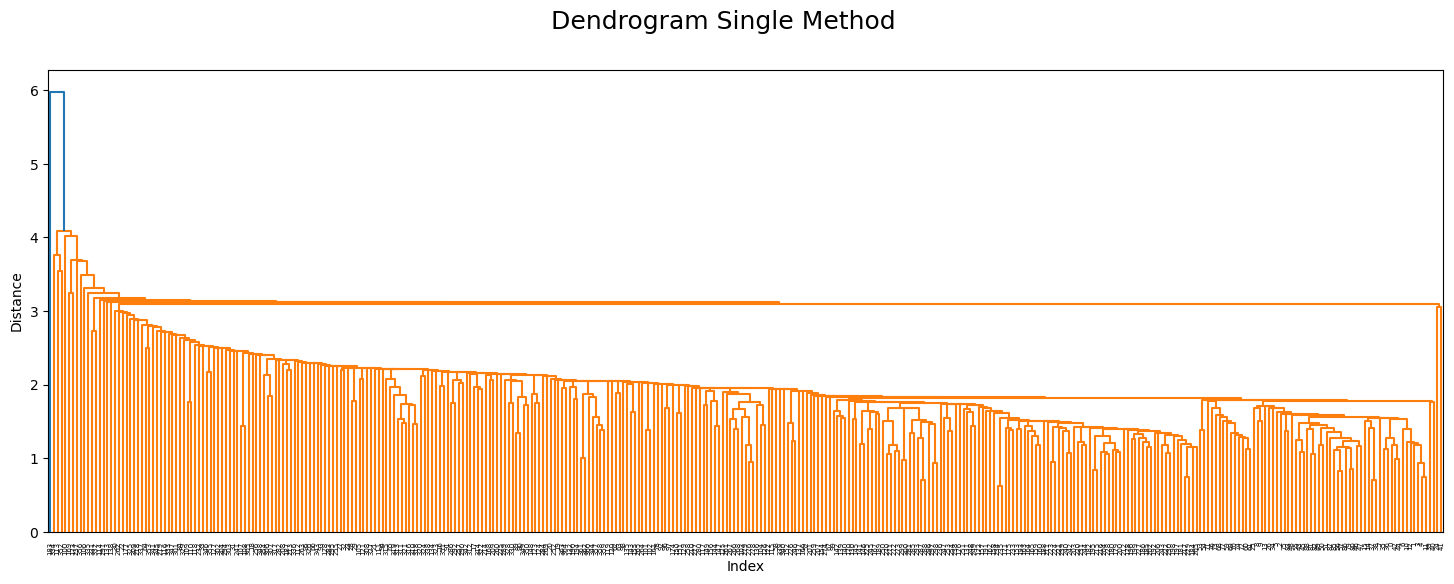

In [50]:
#Compare only Madrid and Belgrade in 2019 - single method

distance_single = linkage(scaled_2019.loc[:,
['MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',]],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

### Complete Method

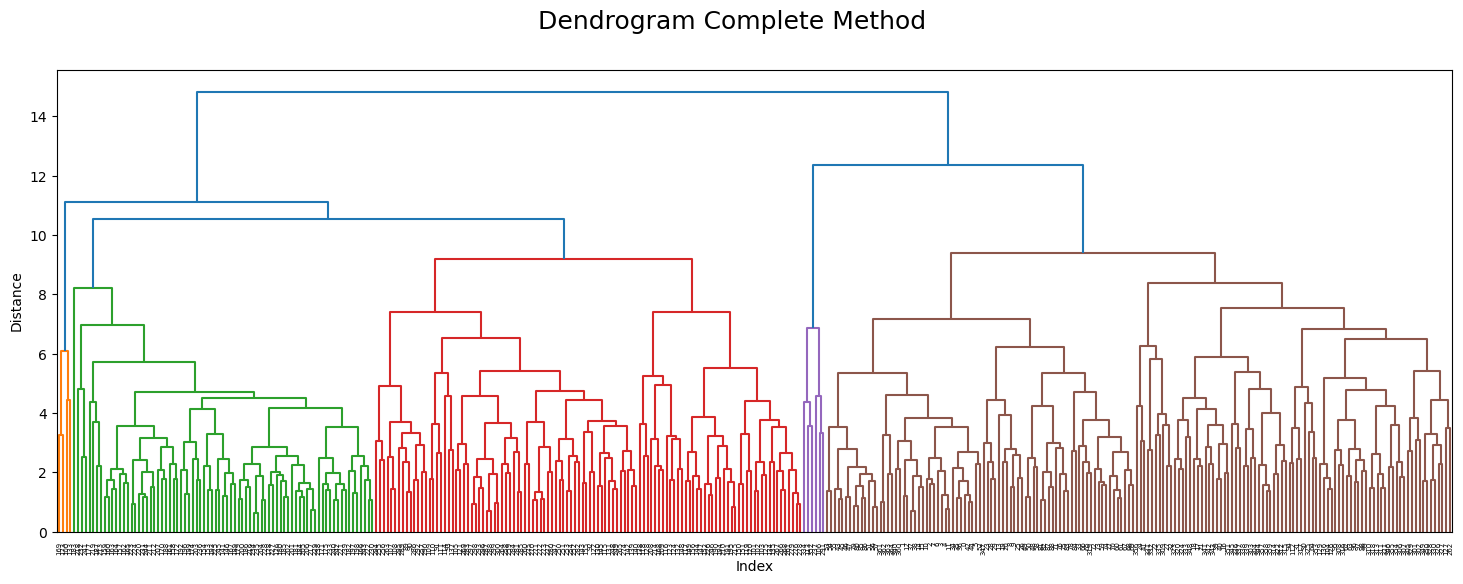

In [54]:
#Comparing only Madrid and Belgrade 2019 - complete method

distance_single = linkage(scaled_2019.loc[:,
['MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',]],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

### Average Method

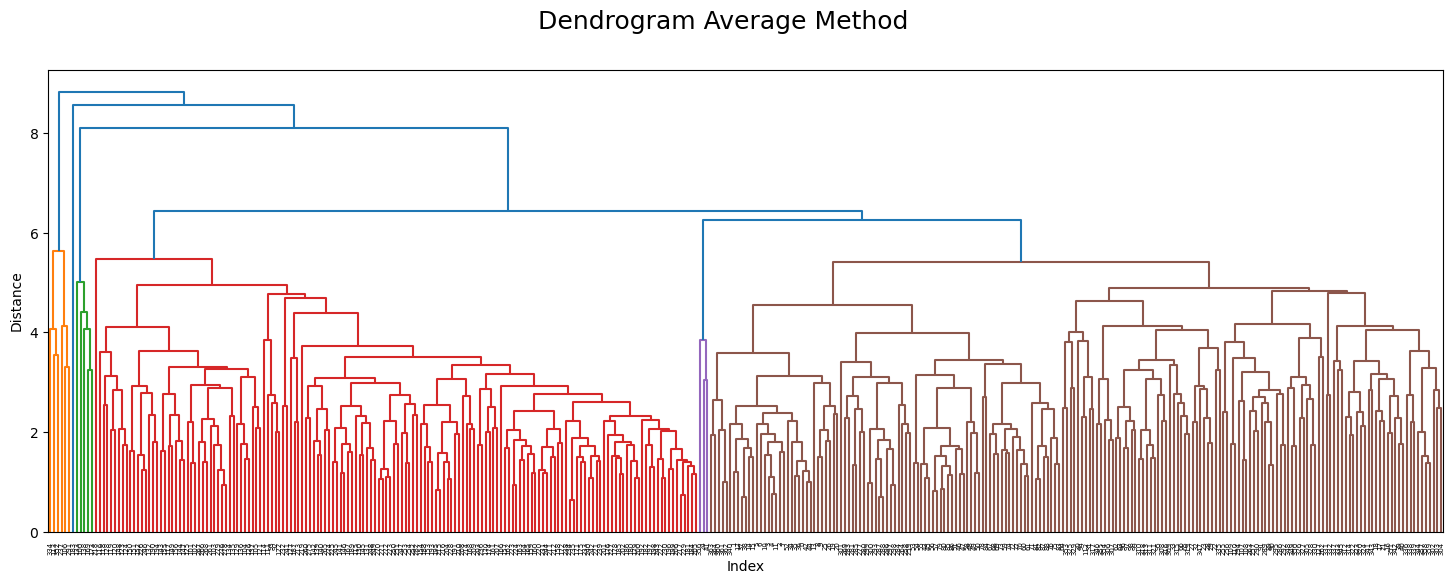

In [57]:
#Comparing only Madrid and Belgrade 2019 - average method

distance_single = linkage(scaled_2019.loc[:,
['MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
  'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',]],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

### Ward Method

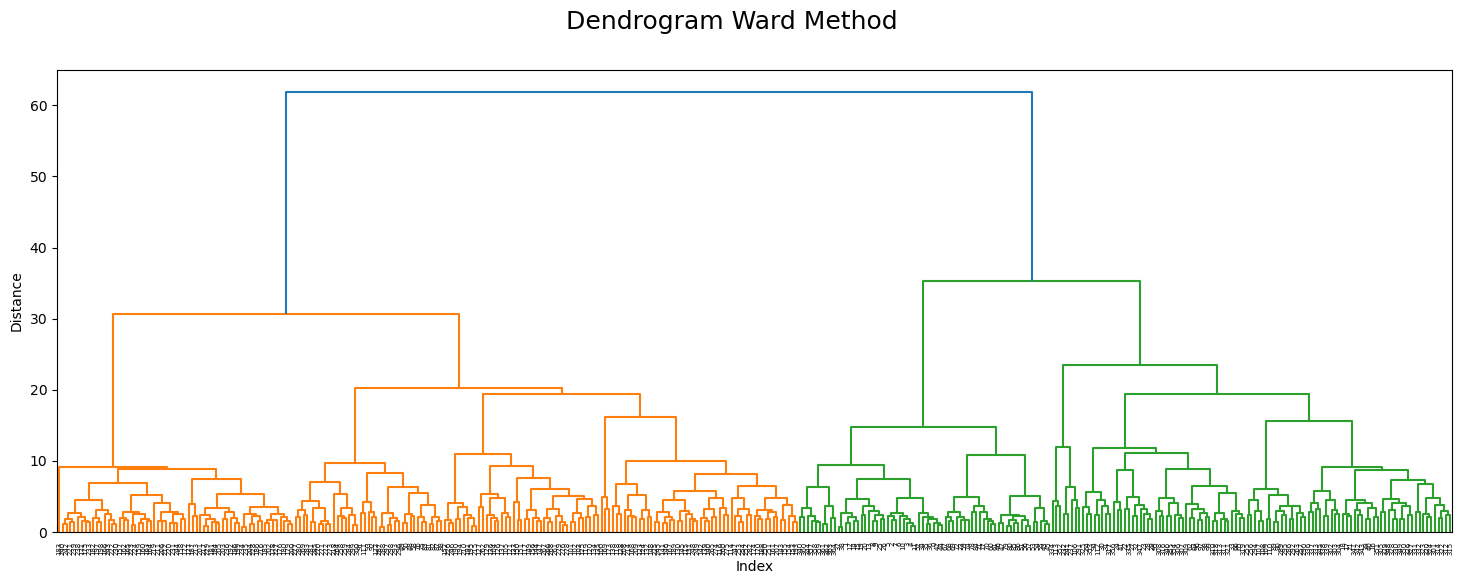

In [62]:
#Comparing only Madrid and Belgrade 2019 - Ward method

distance_single = linkage(scaled_2019.loc[:,
['MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
  'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',]],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

## Compare All Stations

### Single Method (All Stations)

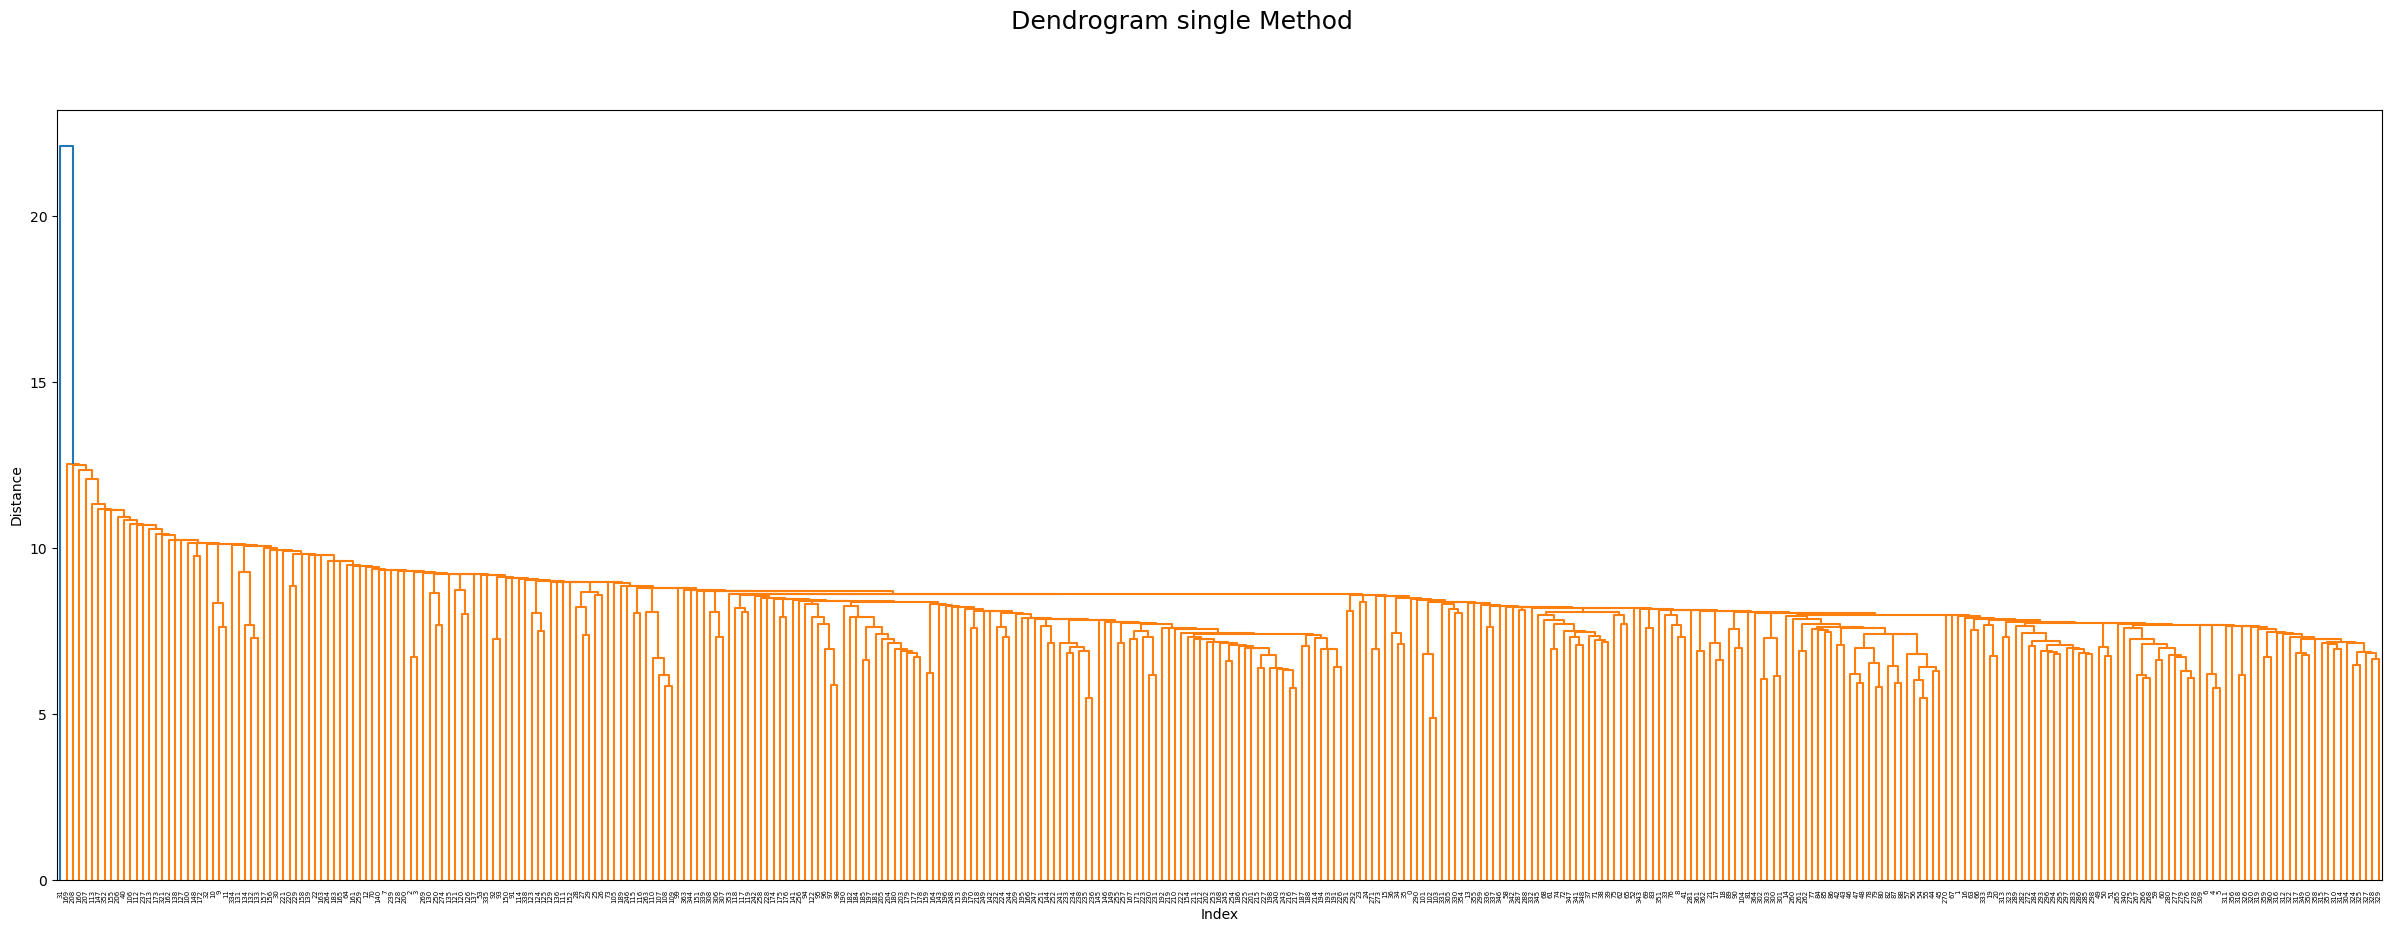

In [68]:
#Comparing all stations 2019 - single method

distance_single = linkage(scaled_2019.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="single")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram single Method",fontsize=18)
plt.show()

### Complete Method (All Stations)

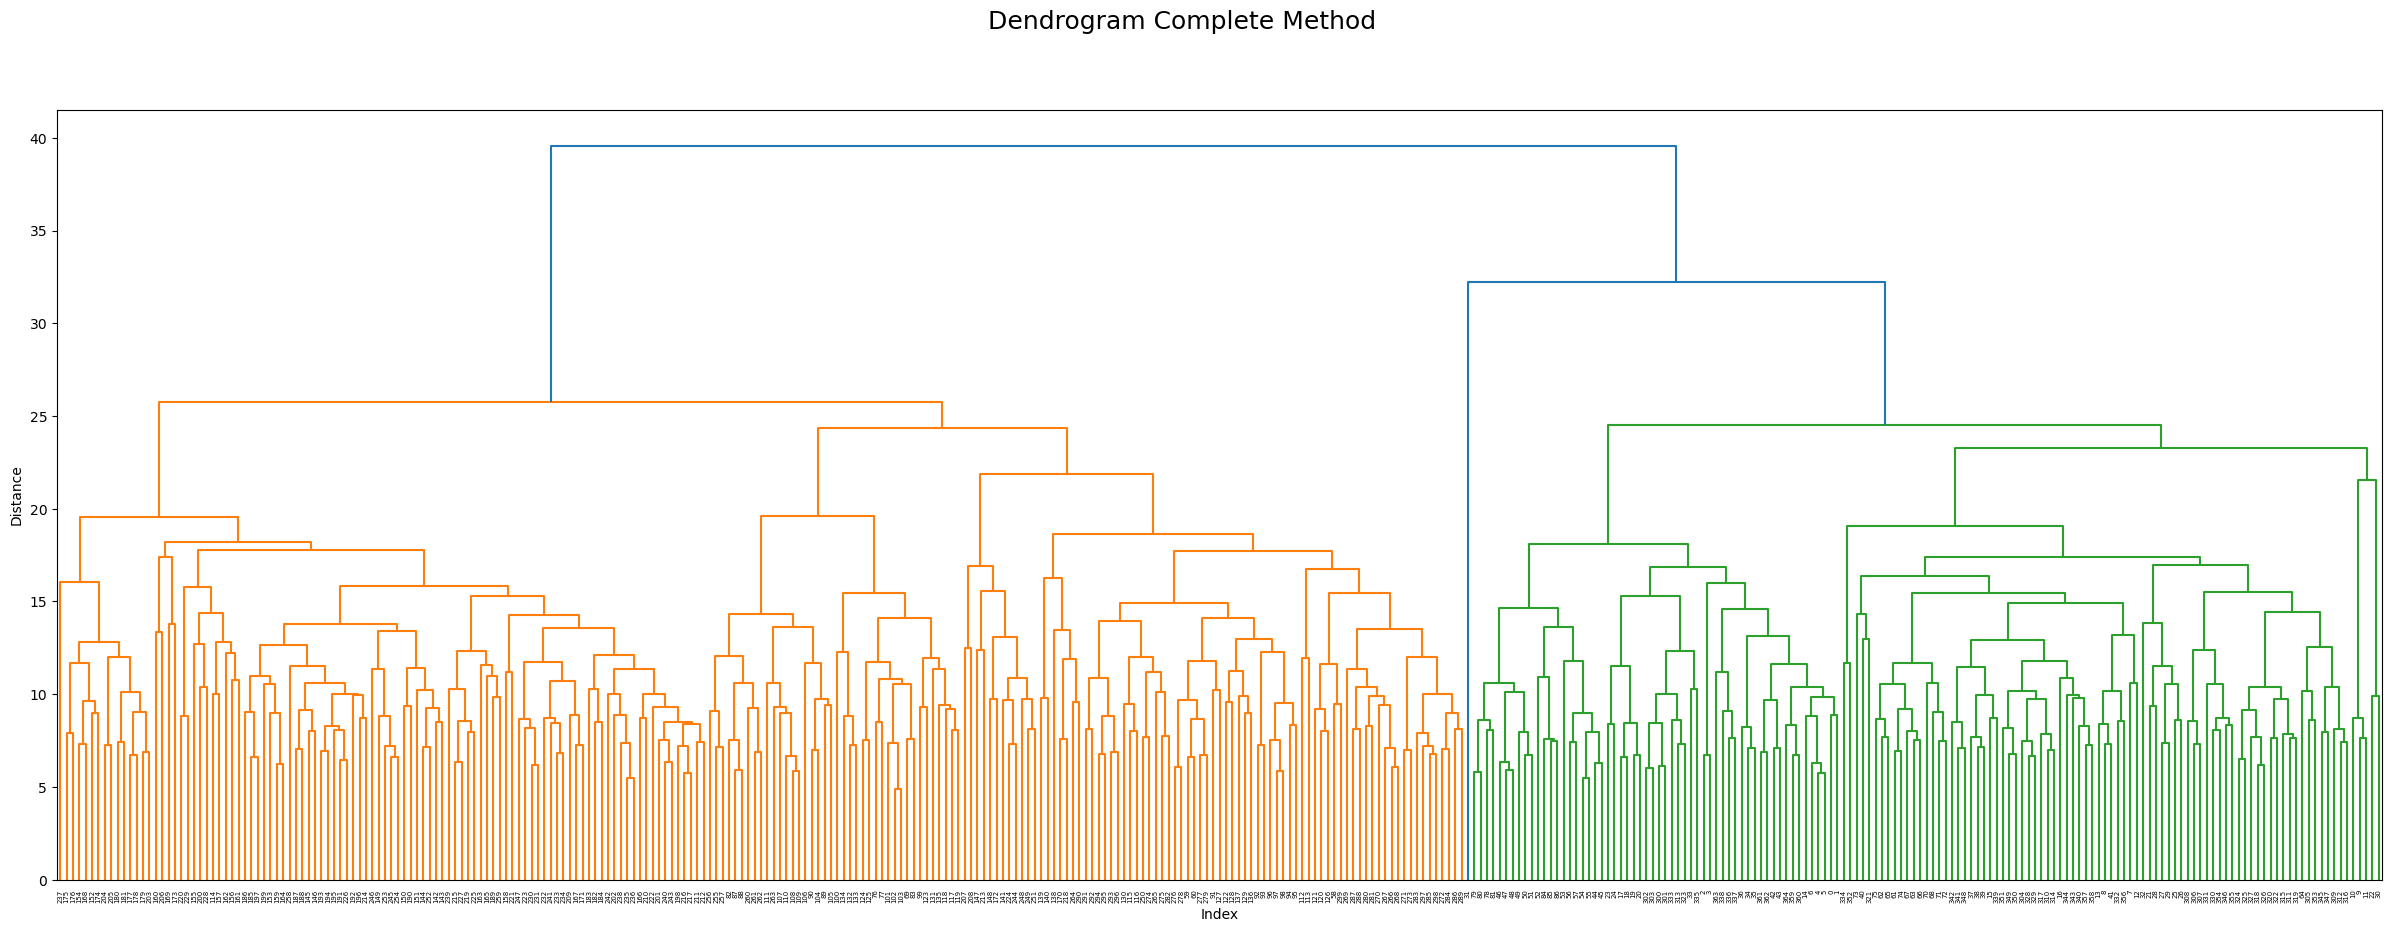

In [73]:
#Comparing all stations 2019 - complete method

distance_single = linkage(scaled_2019.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="complete")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

### Average Method (All Stations)

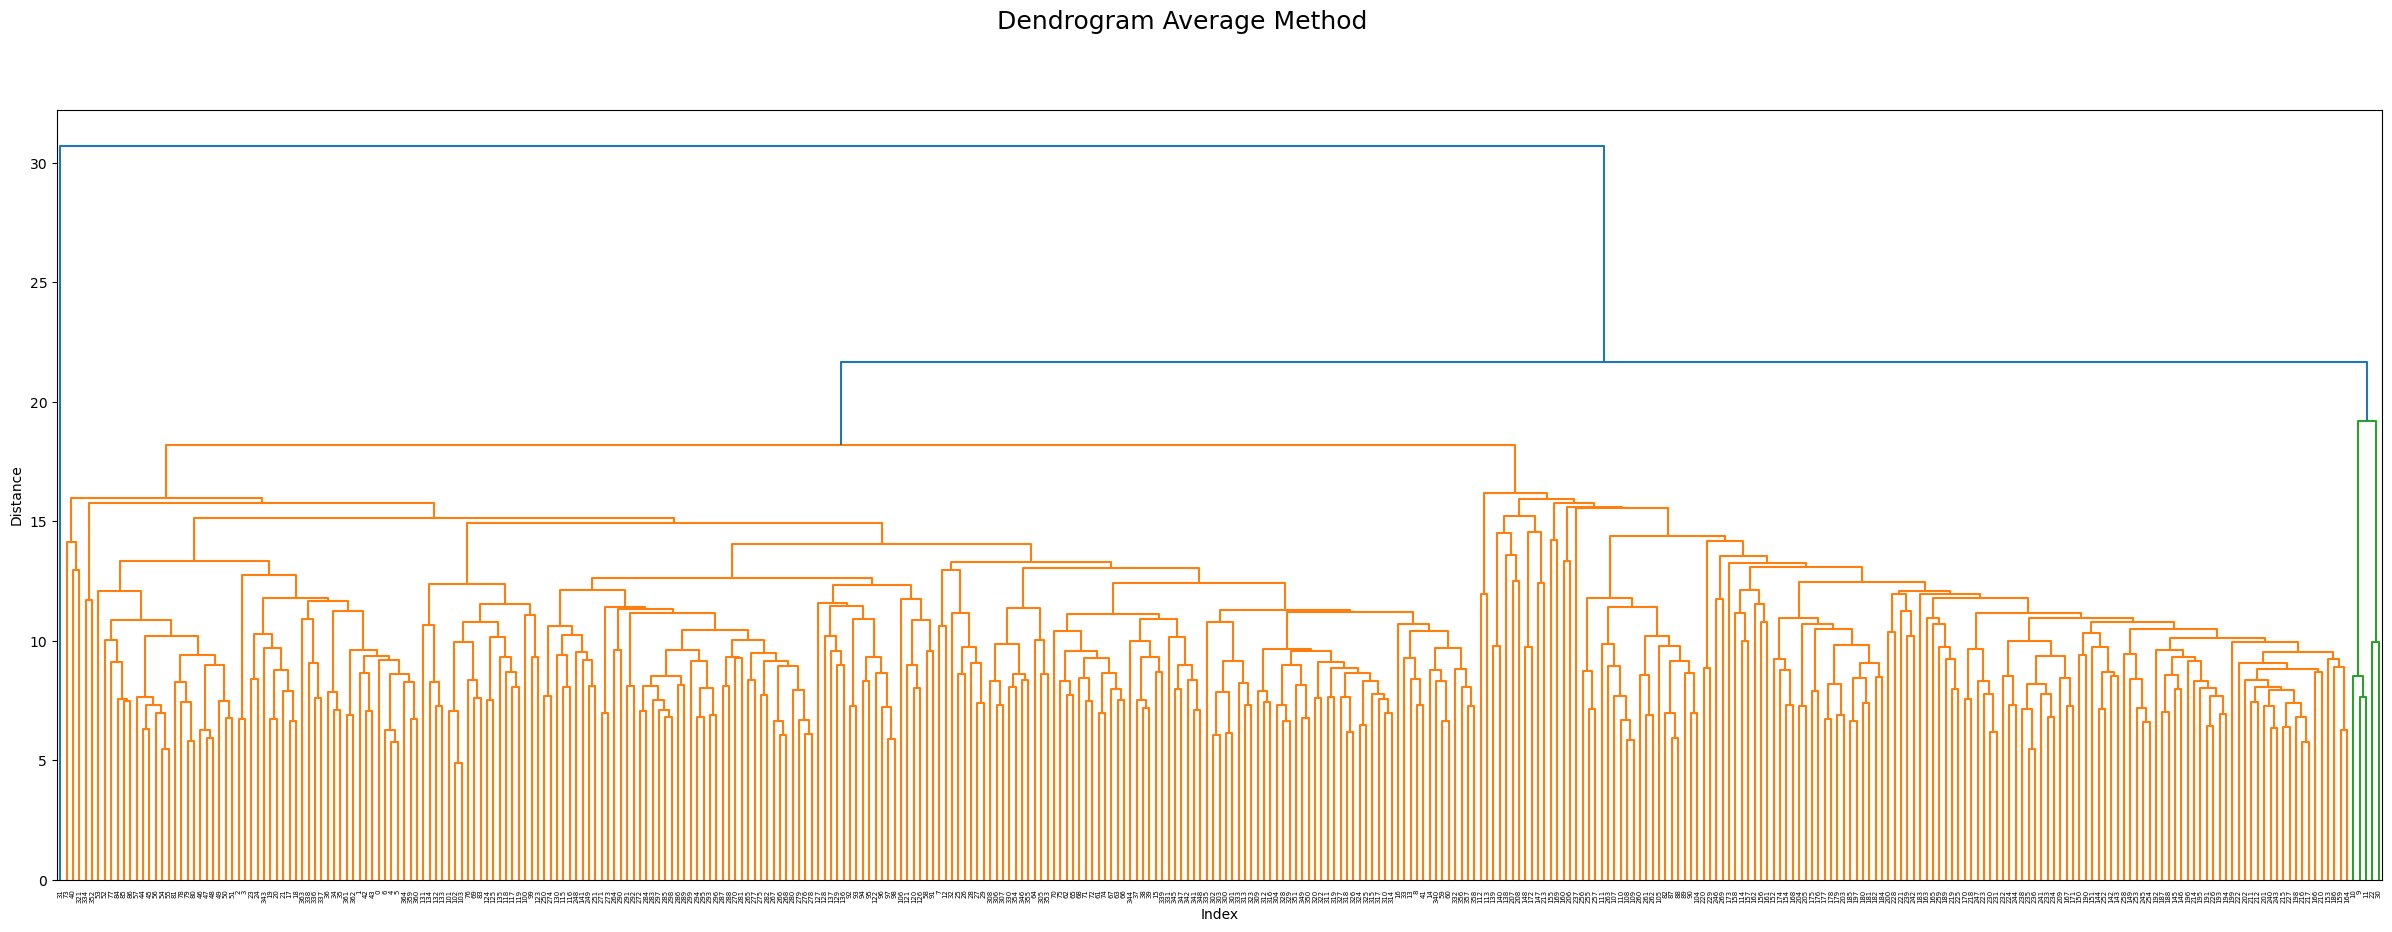

In [76]:
#Comparing all stations 2019 - average method

distance_single = linkage(scaled_2019.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="average")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

### Ward Method (All Stations)

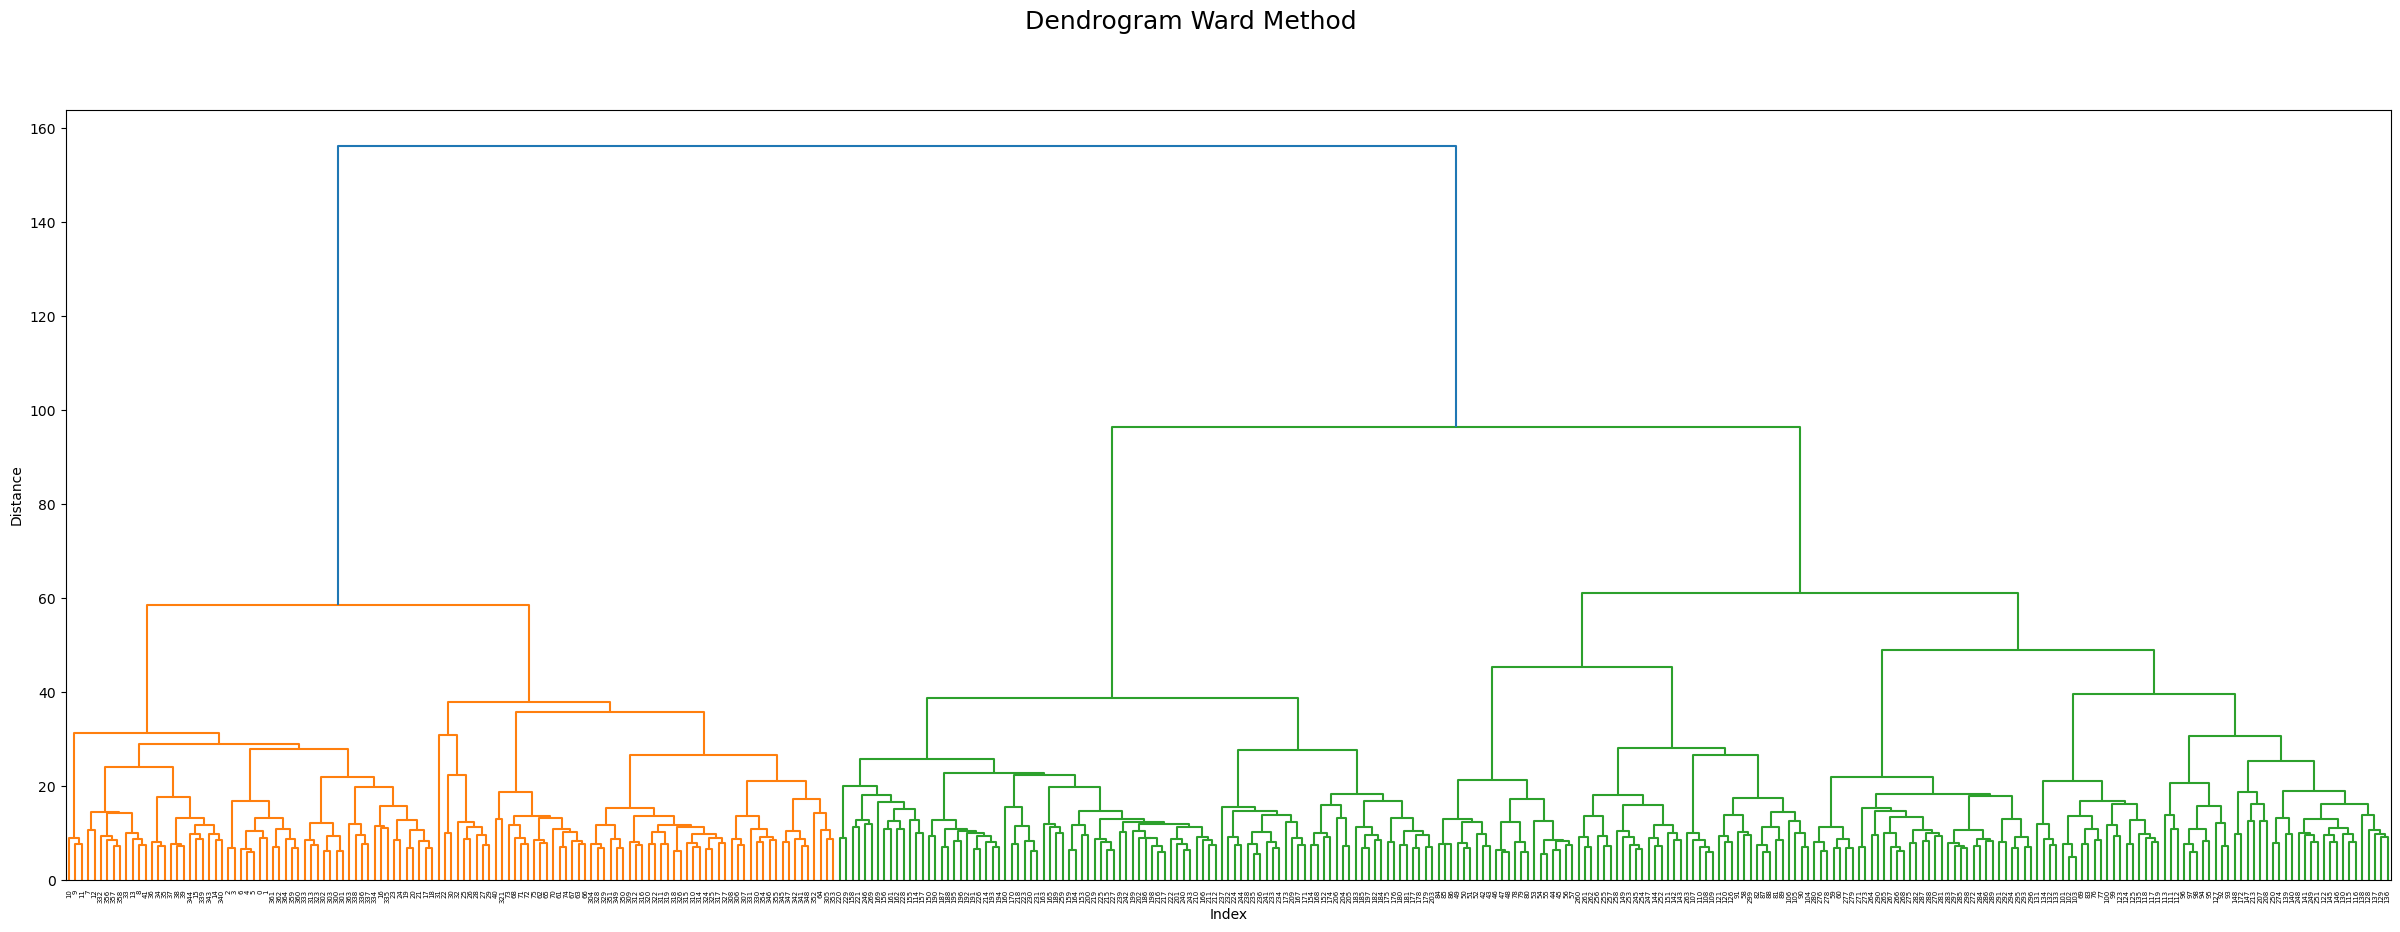

In [97]:
#Comparing all stations 2019 - average method

distance_single = linkage(scaled_2019.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="ward")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

### Principal Components Analysis (PCA)

In [84]:
cols = ['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max'
]
df3 = scaled_2019[cols]
df3

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.336058,0.515763,1.150256,1.854928,-0.605872,-0.312858,-0.1206,-1.148010,-0.925549,-0.819644,...,0.0,-1.110223e-16,-2.220446e-16,-0.941645,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
1,0.766448,0.018790,-0.270393,2.127592,-1.105245,-0.442060,-0.1206,-1.126370,-1.162229,-1.074041,...,0.0,-1.110223e-16,-2.220446e-16,-0.907271,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
2,-0.955112,-1.173946,-0.103257,2.536589,-0.617221,-0.463593,-0.1206,-0.044405,-1.663433,-1.694132,...,0.0,-1.110223e-16,-2.220446e-16,-1.067681,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
3,-0.524722,-0.875762,0.565283,2.411618,-0.639920,-0.463593,-0.1206,-0.001126,-1.635589,-1.678232,...,0.0,-1.110223e-16,-2.220446e-16,-1.010392,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
4,1.196837,-0.378789,0.815986,2.002621,-0.912305,-0.377459,-0.1206,-1.148010,-1.329297,-1.058141,...,0.0,-1.110223e-16,-2.220446e-16,-1.124970,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1.196837,-0.478184,1.651662,1.173267,-1.309534,0.656157,-0.1206,-1.126370,-0.674947,-0.231353,...,0.0,-1.110223e-16,-2.220446e-16,-1.228090,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
361,0.766448,-0.080605,1.150256,2.388896,-1.082546,-0.463593,-0.1206,-0.866699,-1.106540,-1.217139,...,0.0,-1.110223e-16,-2.220446e-16,-1.044765,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
362,0.336058,-0.875762,1.735230,2.468423,-0.787462,-0.463593,-0.1206,-0.087684,-1.733045,-1.551034,...,0.0,-1.110223e-16,-2.220446e-16,-0.998934,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0
363,-1.815891,-0.180000,0.732418,2.093509,-0.753414,-0.463593,-0.1206,0.258545,-1.552055,-1.598734,...,0.0,-1.110223e-16,-2.220446e-16,-1.205175,-5.551115e-17,0.0,1.332268e-15,-3.552714e-15,0.0,0.0


In [86]:
#Run the PCA model, reducing to 9 components (i just randomly chose half the amount of the total 18 weather station )
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(df3)

In [88]:
principalComponents

array([[ -7.87710996,   2.82342139,  -1.04241667, ...,  -1.22417277,
          0.73528512,   0.27009779],
       [ -8.49626926,   5.38415625,   1.50894392, ...,  -1.64992542,
         -0.05940516,   0.86404668],
       [-10.19050543,   7.12590364,   0.85459937, ...,   0.79084875,
         -0.92974811,   2.75212187],
       ...,
       [ -9.38462409,   7.57117668,  -3.54060339, ...,  -0.02509745,
         -0.29005622,   0.39005674],
       [ -7.13674851,   8.6462532 ,  -3.01224737, ...,  -0.61394815,
         -0.52442447,   0.13295891],
       [ -8.56564971,   5.82984488,  -1.64824211, ...,  -1.42430954,
          0.63765175,  -0.32177728]])

In [90]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9'])

In [92]:
dfPCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,-7.877110,2.823421,-1.042417,-4.015804,0.428317,-0.889715,-1.224173,0.735285,0.270098
1,-8.496269,5.384156,1.508944,-3.386135,1.267630,-0.272062,-1.649925,-0.059405,0.864047
2,-10.190505,7.125904,0.854599,-3.936767,0.813699,3.210992,0.790849,-0.929748,2.752122
3,-11.097790,6.040884,0.491590,-5.364309,0.464907,0.709307,1.087348,-0.438508,1.992351
4,-10.044650,3.675074,1.229049,-6.202445,0.100108,-0.152300,-2.201164,-0.906201,0.274569
...,...,...,...,...,...,...,...,...,...
360,-8.829524,2.933543,1.188034,-3.975646,-2.837514,-0.653901,-2.038981,-1.108562,-1.216518
361,-9.594698,6.460104,-0.927244,-4.122788,-2.376830,1.187263,0.178613,-1.432416,0.203210
362,-9.384624,7.571177,-3.540603,-3.419014,-1.539192,1.062651,-0.025097,-0.290056,0.390057
363,-7.136749,8.646253,-3.012247,0.562883,-0.715417,-2.570490,-0.613948,-0.524424,0.132959


## Export the PCA dataset (2019_PCA.csv)

In [95]:
# make sure to use index = false to remove index column that exporting automatically adds since this caused issues
dfPCA.to_csv(os.path.join(path, '2019_PCA.csv'), index=False)
